In [15]:
# To visualize the data, we will use the pymatviz package
# ! pip install pymatviz

In [2]:
import numpy as np
import pandas as pd
from ast import literal_eval

from pymatgen.core import Structure
from pymatviz import StructureWidget
from pymatviz import structure_3d

In [3]:
data = pd.read_csv('/home/user_wanglei/private/datafile/crystalgpt/csp/alex20/csp-6000f/adam_bs_8000_lr_0.0001_decay_0_clip_1_A_119_W_28_N_21_a_1_w_1_l_1_Nf_5_Kx_16_Kl_4_h0_256_l_16_H_16_k_64_m_64_e_32_drop_0.1_0.1//relaxed_structures.csv')
cif_strings = data['relaxed_cif']   # string of pymatgen structure dict

In [4]:
structures =[Structure.from_dict(literal_eval(cif)) for cif in cif_strings]

Analyzing space groups for all structures...
Successfully analyzed 100 out of 100 structures


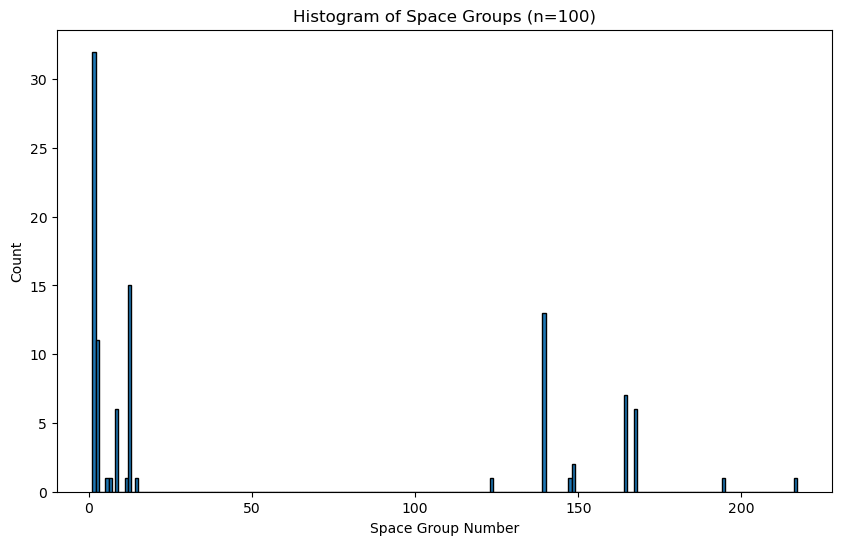

\nSpace Group Analysis Summary:
Total structures analyzed: 100
Unique space groups: 16
Most common space group: 1


In [5]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import matplotlib.pyplot as plt
import warnings

def get_space_group_safe(structure, symprec=0.1, angle_tolerance=5.0):
    """
    Safely get space group number with error handling for problematic structures
    
    Args:
        structure: pymatgen Structure object
        symprec: Symmetry precision (default 0.1)
        angle_tolerance: Angle tolerance in degrees (default 5.0)
    
    Returns:
        Space group number or None if analysis fails
    """
    try:
        # First check for very close atoms that might cause issues
        coords = structure.cart_coords
        min_dist = float('inf')
        
        for i in range(len(coords)):
            for j in range(i+1, len(coords)):
                dist = np.linalg.norm(coords[i] - coords[j])
                min_dist = min(min_dist, dist)
        
        # If atoms are too close (< 0.5 Å), skip this structure
        if min_dist < 0.5:
            print(f"Warning: Structure has atoms too close ({min_dist:.3f} Å), skipping space group analysis")
            return None
        
        # Try with default parameters first
        analyzer = SpacegroupAnalyzer(structure, symprec=symprec, angle_tolerance=angle_tolerance)
        return analyzer.get_space_group_number()
        
    except Exception as e:
        print(f"Space group analysis failed: {str(e)}")
        
        # Try with more relaxed parameters
        try:
            print("Trying with relaxed symmetry parameters...")
            analyzer = SpacegroupAnalyzer(structure, symprec=0.2, angle_tolerance=10.0)
            return analyzer.get_space_group_number()
        except Exception as e2:
            print(f"Space group analysis failed even with relaxed parameters: {str(e2)}")
            return None

# Get space group numbers for all structures with error handling
print("Analyzing space groups for all structures...")
spacegroup_numbers = []
failed_structures = []

for i, struct in enumerate(structures):
    sg_num = get_space_group_safe(struct)
    if sg_num is not None:
        spacegroup_numbers.append(sg_num)
    else:
        failed_structures.append(i)
        print(f"Failed to analyze structure {i}")

print(f"Successfully analyzed {len(spacegroup_numbers)} out of {len(structures)} structures")
if failed_structures:
    print(f"Failed structures: {failed_structures}")

# Plot histogram of space group numbers
if spacegroup_numbers:
    plt.figure(figsize=(10,6))
    plt.hist(spacegroup_numbers, bins=range(min(spacegroup_numbers), max(spacegroup_numbers)+2), edgecolor='black')
    plt.xlabel('Space Group Number')
    plt.ylabel('Count')
    plt.title(f'Histogram of Space Groups (n={len(spacegroup_numbers)})')
    plt.show()
    
    # Print summary statistics
    print(f"\\nSpace Group Analysis Summary:")
    print(f"Total structures analyzed: {len(spacegroup_numbers)}")
    print(f"Unique space groups: {len(set(spacegroup_numbers))}")
    print(f"Most common space group: {max(set(spacegroup_numbers), key=spacegroup_numbers.count)}")
else:
    print("No structures could be analyzed for space groups")


In [6]:
for i, struct in enumerate(structures[:10]):
    sg_num = get_space_group_safe(struct)
    print(f"Structure {i}: Space group number = {sg_num}")


Structure 0: Space group number = 8
Structure 1: Space group number = 14
Structure 2: Space group number = 12
Structure 3: Space group number = 12
Structure 4: Space group number = 139
Structure 5: Space group number = 12
Structure 6: Space group number = 12
Structure 7: Space group number = 1
Structure 8: Space group number = 5
Structure 9: Space group number = 139


In [11]:

structure_3d([structures[3], structures[11], structures[12]], n_cols=1)

In [20]:
StructureWidget(structures[11])

StructureWidget(structure={'@module': 'pymatgen.core.structure', '@class': 'Structure', 'charge': 0.0, 'lattic…